In [ ]:
!pip install transformers==4.25.1
!pip install pytorch-lightning==1.6.4
!pip install timm==0.5.4
!pip install gradio
!pip install donut-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.9/314.9 kB 28.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)
Requested pytorch-lightning==1.6.4 from https://files.pythonhosted.org/packages/79/f9/37f4fd369652a80a1def12ce5af44be93ee7b66dd4de464d37141e29ed58/pytorch_lightning-1.6.4-py3-none-any.whl has invalid


#Let's try several image-to-text model for generation text description for our advertisements

1. Donut model
2. nlpconnect/vit-gpt2-image-captioning
3. SmolVLM-500M
4. Salesforce/blip-image-captioning-large

1. Donut model
 https://github.com/clovaai/donut

In [ ]:
import argparse
import gradio as gr
import torch
from PIL import Image

from donut import DonutModel

In [ ]:
def demo_process_vqa(input_img, question):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    user_prompt = task_prompt.replace("{user_input}", question)
    output = pretrained_model.inference(input_img, prompt=user_prompt)["predictions"][0]
    return output


def demo_process(input_img):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    output = pretrained_model.inference(image=input_img, prompt=task_prompt)["predictions"][0]
    return output

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument("--task", type=str, default="docvqa")
parser.add_argument("--pretrained_path", type=str, default="naver-clova-ix/donut-base-finetuned-docvqa")
args, left_argv = parser.parse_known_args()

task_name = args.task
if "docvqa" == task_name:
    task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"
else:  # rvlcdip, cord, ...
    task_prompt = f"<s_{task_name}>"

pretrained_model = DonutModel.from_pretrained(args.pretrained_path)

if torch.cuda.is_available():
    pretrained_model.half()
    device = torch.device("cuda")
    pretrained_model.to(device)
else:
    pretrained_model.encoder.to(torch.bfloat16)

pretrained_model.eval()

demo = gr.Interface(
    fn=demo_process_vqa if task_name == "docvqa" else demo_process,
    inputs=["image", "text"] if task_name == "docvqa" else "image",
    outputs="json",
    title=f"Donut 🍩 demonstration for `{task_name}` task",
)
demo.launch()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/803M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c7827c47a0ef67705.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Look like there is no good image-to-text description in donut model

2. Let's try nlpconnect/vit-gpt2-image-captioning model 
https://huggingface.co/nlpconnect/vit-gpt2-image-captioning

In [ ]:
pip install transformers timm pillow

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import torch


In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)



VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (inte

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1 (1).jpg


In [ ]:
def caption_image(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values.to(device)

    output_ids = model.generate(pixel_values, max_length=50)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption

print(caption_image("1.jpg"))

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


a suit and tie are on a snowy surface 


as we can see the result is not very good

Let's try SmolVLM-500M model
https://huggingface.co/HuggingFaceTB/SmolVLM-500M-Instruct

In [ ]:
from transformers import AutoTokenizer, AutoProcessor, AutoModelForVision2Seq
from PIL import Image
import torch

In [ ]:
model_id = "HuggingFaceTB/SmolVLM-500M-Instruct"

processor = AutoProcessor.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

In [ ]:
model = AutoModelForVision2Seq.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

Idefics3ForConditionalGeneration(
  (model): Idefics3Model(
    (vision_model): Idefics3VisionTransformer(
      (embeddings): Idefics3VisionEmbeddings(
        (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), padding=valid)
        (position_embedding): Embedding(1024, 768)
      )
      (encoder): Idefics3Encoder(
        (layers): ModuleList(
          (0-11): 12 x Idefics3EncoderLayer(
            (self_attn): Idefics3VisionAttention(
              (k_proj): Linear(in_features=768, out_features=768, bias=True)
              (v_proj): Linear(in_features=768, out_features=768, bias=True)
              (q_proj): Linear(in_features=768, out_features=768, bias=True)
              (out_proj): Linear(in_features=768, out_features=768, bias=True)
            )
            (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
            (mlp): Idefics3VisionMLP(
              (activation_fn): GELUTanh()
              (fc1): Linear(in_features=768, out

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1 (1).jpg


In [ ]:
def describe_image(image_path: str):
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)
    plt.axis('off')

    #prompt = "<image>\nDescribe items on this image in one sentence."
    prompt = "<image>\nShort description of items on this image in one sentence."

    # подготовка входов
    inputs = processor(
        text=prompt,
        images=image,
        return_tensors="pt"
    ).to(device, torch.float16)

    # генерация
    output_ids = model.generate(
        **inputs,
        max_new_tokens=128,
        do_sample=False
    )
    text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return text

Описание изображения: 




Short description of items on this image in one sentence.
Two tops are placed on a marble surface. One is a beige color and the other is blue. One of them is a denim jacket. A person's leg is visible on the left bottom of the image. Confederation of Independent Trade Unions (COITU)

The Confederation of Independent Trade Unions (COITU) is a trade union


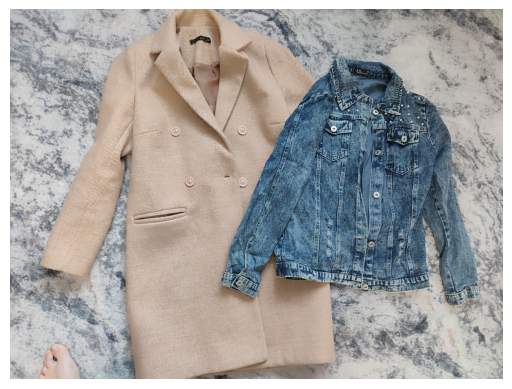

In [ ]:
result = describe_image("1.jpg")
print("Описание изображения:", result)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 18.jpg to 18.jpg


In [ ]:
import matplotlib.pyplot as plt


Описание изображения: 





Short description of items on this image in one sentence.
The items are glass cups and teapot. The teapot is white with pink and purple floral designs. The cups are mostly clear with gold rimmed circles. The teapot is on the left of the cups. The cups are on the right of the teapot. The teapot is on the left of the cups. The teapot is on the right of the cups. The teapot is on the left of the cups. The teapot is on the right of the cups. The teapot is on the left of the cups. The teapot is on the right of


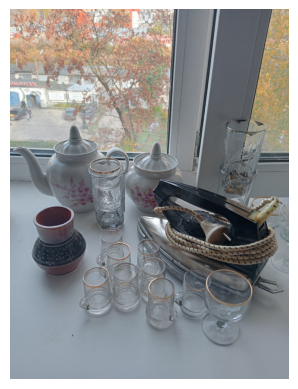

In [ ]:
result = describe_image("18.jpg")
print("Описание изображения:", result)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 7.jpg to 7.jpg


Описание изображения: 





Short description of items on this image in one sentence.
A dog is sitting on a plaid blanket in a vehicle. The blanket has a red, blue, and green plaid pattern. The dog is wearing a harness and is looking out the window. There are trees outside the window. There is a car seat in the back seat. There is a backpack on the seat next to the dog. There is a green leash with a collar on the dog. There is a black object in the back seat. There is a piece of wood in the back seat. There is a blue object in the back seat. There is a white object in the back seat. There is a blue


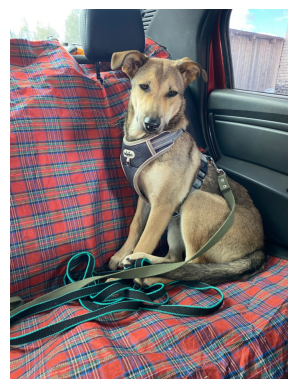

In [ ]:
result = describe_image("7.jpg")
print("Описание изображения:", result)

Let's try to specify the promt for cloths only

In [ ]:
def describe_clothes(image_path: str):
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)
    plt.axis('off')

    prompt = "<image>\nDescribe in detail the clothing, style, and all garments visible."

    inputs = processor(
        text=prompt,
        images=image,
        return_tensors="pt"
    ).to(device, torch.float16)

    output_ids = model.generate(
        **inputs,
        max_new_tokens=128,
        temperature=0.1,
        do_sample=True
    )

    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

Описание изображения: 




Describe in detail the clothing, style, and all garments visible.

The image shows two clothing items placed on a marble surface. The clothing items are both jackets. The jacket on the left is a light beige color, while the jacket on the right is a blue denim jacket. Both jackets are double-breasted, with the beige jacket having two rows of buttons, while the blue denim jacket has three rows of buttons. Both jackets have a slim fit and are of similar length.

The beige jacket has a black garment hanger at the top of the jacket, indicating that it is hanging up or ready to be worn. The blue denim jacket has a black


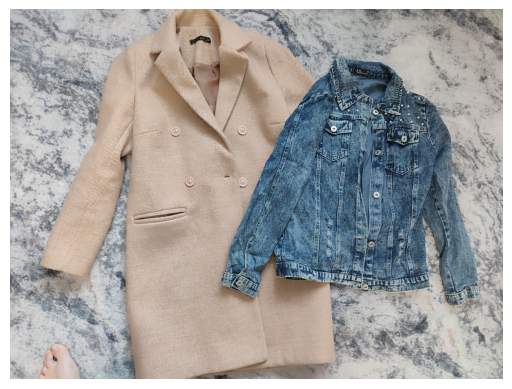

In [ ]:
result = describe_clothes("1.jpg")
print("Описание изображения:", result)

So, this model give us great detailed description.it works good with differents items, not only cloths.

Let's try Salesforce/blip-image-captioning-large BLIP model
https://huggingface.co/Salesforce/blip-image-captioning-large

In [ ]:
pip install transformers pillow accelerate

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

In [ ]:
model_name = "Salesforce/blip-image-captioning-large"

processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name).to(
    "cuda" if torch.cuda.is_available() else "cpu"
)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [ ]:
def describe_items(image_path):
    image = Image.open(image_path).convert("RGB")

    #prompt = "Describe in detail the clothing, objects, and visible items in the image in one sentence."

    inputs = processor(images=image, return_tensors="pt").to(model.device)

    output_ids = model.generate(
        **inputs,
        max_new_tokens=60
    )

    caption = processor.decode(output_ids[0], skip_special_tokens=True)
    return caption

In [ ]:
print(describe_items("1.jpg"))

arafed coat and jeans on a table next to a pair of shoes


Description without promt is not clear. The Blip2 model is better with promt description. 

#conclusion
I think we can try to use SmolVLM-500M-Instruct model for description generation. 
The model is small, It can run inference on one image with 1.23GB of GPU RAM
License: Apache 2.0